### Image Captioning App

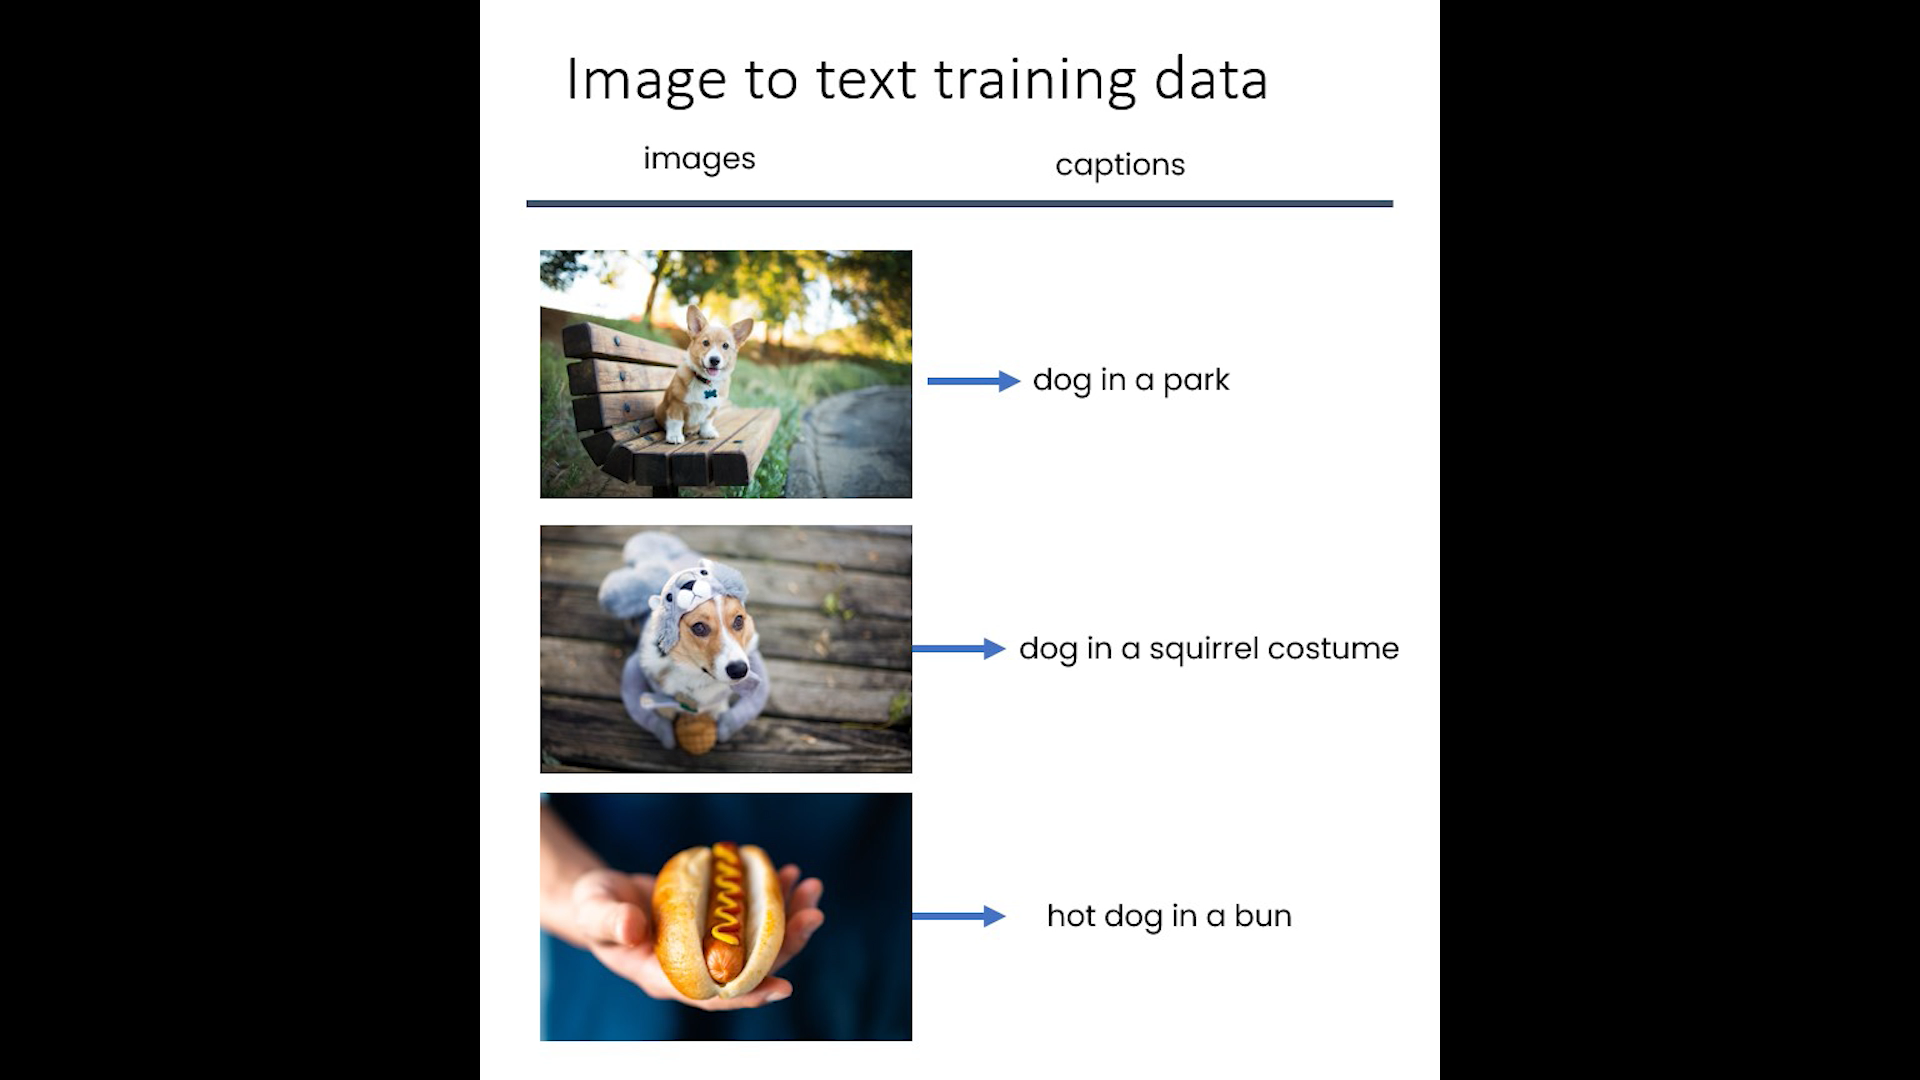

In [1]:
import os
import io
import IPython.display
from PIL import Image
import base64 
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
hf_api_key = os.environ['HF_API_KEY']

In [3]:
# Use a pipeline as a high-level helper
from transformers import pipeline
import json

pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")
def get_completion(input):
    output = pipe(input)
    return output[0]['generated_text']

image_url = "https://free-images.com/sm/9596/dog_animal_greyhound_983023.jpg"
display(IPython.display.Image(url=image_url))
get_completion(image_url)

e:\Github\LLM\.conda\lib\site-packages\transformers\generation\utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'a dog wearing a santa hat and a red scarf'

## Captioning with `gr.Interface()`

#### gr.Image()
- The `type` parameter is the format that the `fn` function expects to receive as its input.  If `type` is `numpy` or `pil`, `gr.Image()` will convert the uploaded file to this format before sending it to the `fn` function.
- If `type` is `filepath`, `gr.Image()` will temporarily store the image and provide a string path to that image location as input to the `fn` function.

In [6]:
import gradio as gr 

### If you are not running locally
'''
def image_to_base64_str(pil_image):
    byte_arr = io.BytesIO()
    pil_image.save(byte_arr, format='PNG')
    byte_arr = byte_arr.getvalue()
    return str(base64.b64encode(byte_arr).decode('utf-8'))

'''

pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")
def get_completion(input):
    output = pipe(input)
    return output[0]['generated_text']

gr.close_all()
demo = gr.Interface(fn=get_completion,
                    inputs=[gr.Image(label="Upload image", type="pil")],
                    outputs=[gr.Textbox(label="Caption")],
                    title="Image Captioning with BLIP",
                    description="Caption any image using the BLIP model",
                    allow_flagging="never",
                    examples=["firefly.png"])

demo.launch(share=False, server_port=int(os.environ['PORT1']))

Closing server running on port: 8081
Running on local URL:  http://127.0.0.1:8081

To create a public link, set `share=True` in `launch()`.


e:\Github\LLM\.conda\lib\site-packages\transformers\generation\utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [7]:
gr.close_all()

Closing server running on port: 8081
Closing server running on port: 8081
